<a href="https://colab.research.google.com/github/janpeter19/BPL_TEST2_Fedbatch/blob/main/BPL_TEST2_Fedbatch_colab_me.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BPL_TEST2_Fedbatch script with FMPy...

The key library PyFMI ver 2.9.8 is installed. 

After the installation a small application BPL_CHO_Fedbatch is loaded and run. You can continue with this example if you like.

In [ ]:
!lsb_release -a # Actual VM Ubuntu version used by Google

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 20.04.5 LTS
Release:	20.04
Codename:	focal


In [ ]:
%env PYTHONPATH=

env: PYTHONPATH=


In [ ]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py38_22.11.1-1-Linux-x86_64.sh 
!chmod +x Miniconda3-py38_22.11.1-1-Linux-x86_64.sh
!bash ./Miniconda3-py38_22.11.1-1-Linux-x86_64.sh -b -f -p /usr/local 
import sys 
sys.path.append('/usr/local/lib/python3.8/site-packages/')

--2023-01-21 09:07:33--  https://repo.anaconda.com/miniconda/Miniconda3-py38_22.11.1-1-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64630241 (62M) [application/x-sh]
Saving to: ‘Miniconda3-py38_22.11.1-1-Linux-x86_64.sh’

Miniconda3-py38_22. 100%[===================>]  61.64M   138MB/s    in 0.4s    

2023-01-21 09:07:33 (138 MB/s) - ‘Miniconda3-py38_22.11.1-1-Linux-x86_64.sh’ saved [64630241/64630241]

PREFIX=/usr/local
Unpacking payload ...
                                                                                      
Installing base environment...





Preparing transaction: - done
Executing transaction: | / - \ done
installation finished.


In [ ]:
!conda update -n base -c defaults conda --yes

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/linux-64::tbb==2021.7.0=h924138e_1
  - conda-forge/linux-64::numpy==1.24.1=py38hab0fcb9_0
  - conda-forge/linux-64::suitesparse==5.10.1=h9e50725_1
  - conda-forge/linux-64::scipy==1.10.0=py38h10c12cc_0
  - conda-forge/linux-64::libcblas==3.9.0=16_linux64_openblas
  - conda-forge/linux-64::libopenblas==0.3.21=pthreads_h78a6416_3
  - conda-forge/linux-64::pyfmi==2.9.8=py38h26c90d9_1
  - conda-forge/linux-64::assimulo==3.3=py38h71f17ff_1
  - conda-forge/linux-64::libblas==3.9.0=16_linux64_openblas
  - conda-forge/linux-64::liblapack==3.9.0=16_linux64_openblas
  - conda-forge/linux-64::libhwloc==2.8.0=h32351e8_1
  - conda-forge/linux-64::fmilib==2.4.1=h27087fc_0
  - conda-forge/linux-64::sundials==6.4.1=h89a52a3_0
/ - \ | / - \ | / - \ 

In [ ]:
!conda --version
!python --version

conda 22.11.1
Python 3.8.15


In [ ]:
!conda install -c conda-forge fmpy --yes # Install the key package

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/linux-64::tbb==2021.7.0=h924138e_1
  - conda-forge/linux-64::numpy==1.24.1=py38hab0fcb9_0
  - conda-forge/linux-64::suitesparse==5.10.1=h9e50725_1
  - conda-forge/linux-64::scipy==1.10.0=py38h10c12cc_0
  - conda-forge/linux-64::libcblas==3.9.0=16_linux64_openblas
  - conda-forge/linux-64::libopenblas==0.3.21=pthreads_h78a6416_3
  - conda-forge/linux-64::pyfmi==2.9.8=py38h26c90d9_1
  - conda-forge/linux-64::assimulo==3.3=py38h71f17ff_1
  - conda-forge/linux-64::libblas==3.9.0=16_linux64_openblas
  - conda-forge/linux-64::liblapack==3.9.0=16_linux64_openblas
  - conda-for

# BPL_TEST2_Fedbatch setup


Now specific installation and the run simulations. Start with connecting to Github. Then upload the two files:

* FMU - BPL_TEST2_Fedbatch_linux_om_me.fmu
* Setup-file - BPL_TEST2_Fedbatch_explore.me.py

In [ ]:
%%bash 
git clone https://github.com/janpeter19/BPL_TEST2_Fedbatch

Cloning into 'BPL_TEST2_Fedbatch'...


In [ ]:
%cd BPL_TEST2_Fedbatch

/content/BPL_TEST2_Fedbatch/BPL_TEST2_Fedbatch/BPL_TEST2_Fedbatch


In [1]:
run -i BPL_TEST2_Fedbatch_fmpy_explore.py

Linux - run FMU pre-comiled OpenModelica 1.21.0

Model for bioreactor has been setup. Key commands:
 - par()       - change of parameters and initial values
 - init()      - change initial values only
 - simu()      - simulate and plot
 - newplot()   - make a new plot
 - show()      - show plot from previous simulation
 - disp()      - display parameters and initial values from the last simulation
 - describe()  - describe culture, broth, parameters, variables with values/units

Note that both disp() and describe() takes values from the last simulation

Brief information about a command by help(), eg help(simu)
Key system information is listed with the command system_info()


In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [25/2.54, 20/2.54]

In [3]:
import warnings
warnings.filterwarnings("ignore")

## BPL_TEST2_Fedbatch - demo



In [4]:
describe('culture'); print(); #describe('liquidphase')                                  # Pump schedule parameter 


Simplified text book model - only substrate S and cell concentration X



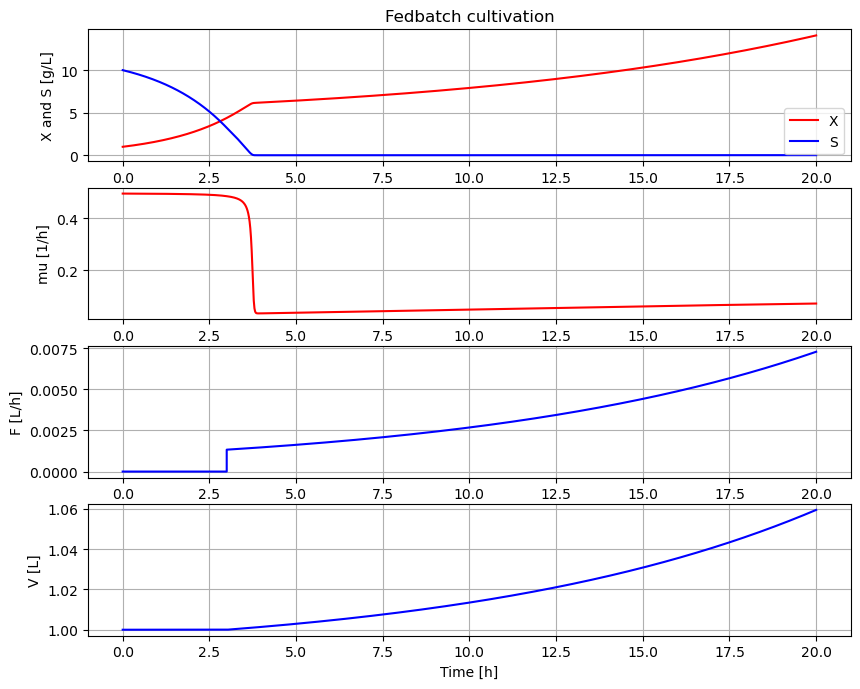

In [5]:
# Simulation with default values of the process
newplot(plotType='TimeSeries')
simu(20)

In [6]:
disp(mode='long')

bioreactor.V_0 : V_0 : 1.0
bioreactor.m_0[1] : VX_0 : 0.0
bioreactor.m_0[2] : VS_0 : 0.0
bioreactor.culture.Y : Y : 0.5
bioreactor.culture.qSmax : qSmax : 1.0
bioreactor.culture.Ks : Ks : 0.1
feedtank.c_in[2] : feedtank.S_in : 0.0
feedtank.V_0 : feedtank.V_0 : 100.0
dosagescheme.mu_feed : mu_feed : 0.2
dosagescheme.t_start : t_start : 2.0
dosagescheme.F_start : F_start : 0.12
dosagescheme.F_max : F_max : 3.0


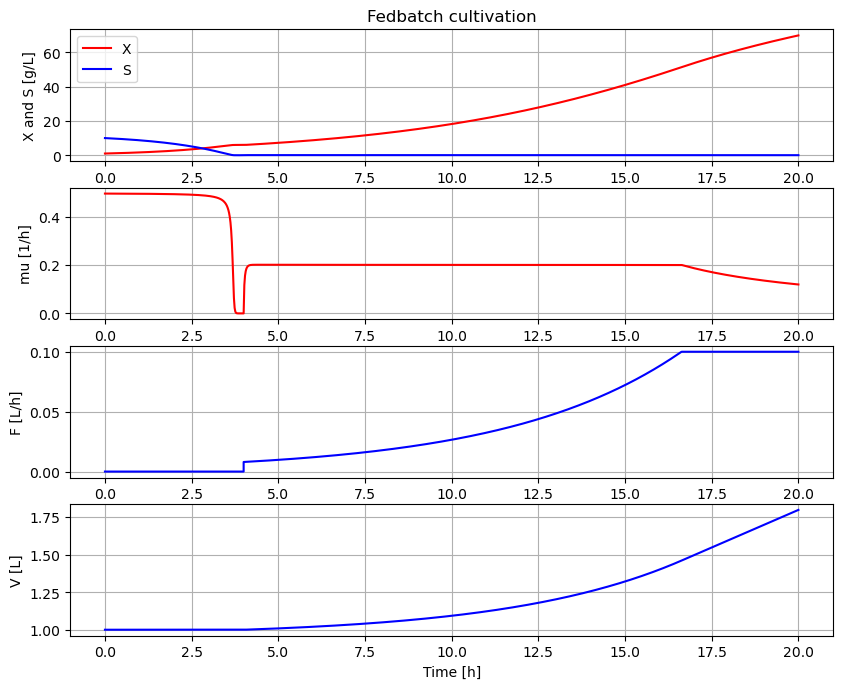

In [7]:
# A more typical feed scheme for the culture at hand
newplot(plotType='TimeSeries')
par(t_start=4, F_start=0.008, mu_feed=0.2, F_max=0.1)
simu(20)

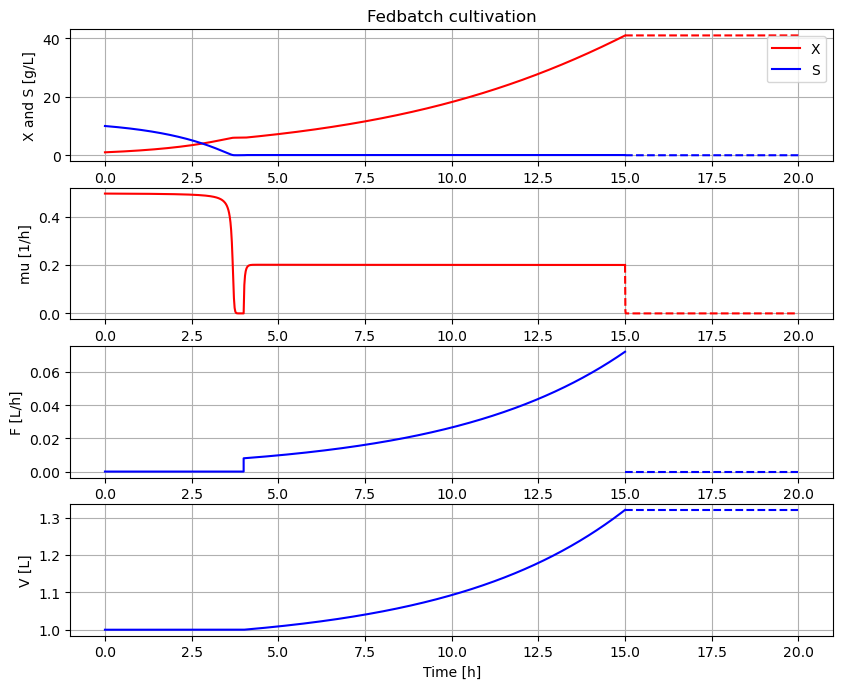

In [13]:
# Test function simu(mode='cont')
newplot()
simu(15)
simu(5,'cont')

In [8]:
disp('culture')

Y : 0.5
qSmax : 1.0
Ks : 0.1


In [9]:
describe('mu')

Cell specific growth rate variable : 0.12 [ 1/h ]


In [10]:
describe('parts')

['bioreactor', 'bioreactor.culture', 'dosagescheme', 'feedtank']


In [11]:
describe('MSL')

MSL: 3.2.3 - used components: RealInput, RealOutput


In [12]:
system_info()


System information
 -OS: Linux
 -Python: 3.8.16
 -Scipy: not installed in the notebook
 -FMPy: 0.3.15
 -FMU by: OpenModelica Compiler OpenModelica 1.21.0~dev-185-g9d983b8
 -FMI: 2.0
 -Type: ME
 -Name: BPL_TEST2.Fedbatch
 -Generated: 2023-01-19T09:29:14Z
 -MSL: 3.2.3
 -Description: Bioprocess Library version 2.1.1-beta
 -Interaction: FMU-explore for FMPy version 0.9.7b
